# Codsoft Internship

Task 3 : Iris flower classification. Name: TUSHAR KUMAR GUPTA.

Context
The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

In this analysis, we will focus on classifying Iris flowers into their respective species based on various attributes. Using features such as petal and sepal length and width, we aim to build a model that accurately categorizes each flower. We will evaluate different classification algorithms to determine the most effective method for predicting Iris species.

# Importing necessary libraries and the Dataset

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.tight_layout()
from sklearn.preprocessing import LabelEncoder,StandardScaler

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

<Figure size 640x480 with 0 Axes>

In [15]:
#Reading dataset and displaying dataframe
d = pd.read_csv("IRIS.csv")

# Basic Analysis

In [16]:
df=pd.DataFrame(d)
d

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [19]:
df.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [22]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [21]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [26]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

# Data Visualization

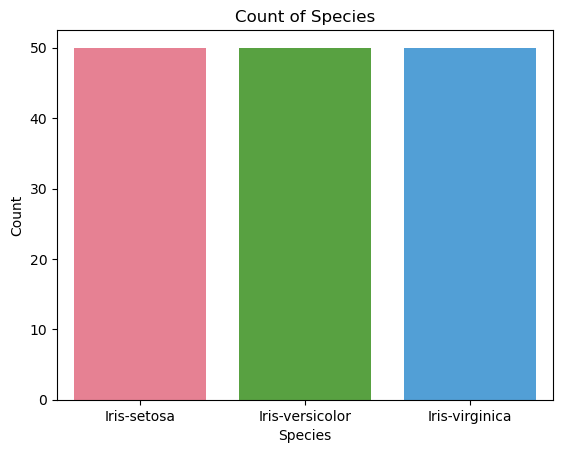

In [41]:
#Countplot 
sns.countplot(data=df,x='species',palette='husl')

plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Count of Species')

plt.show()

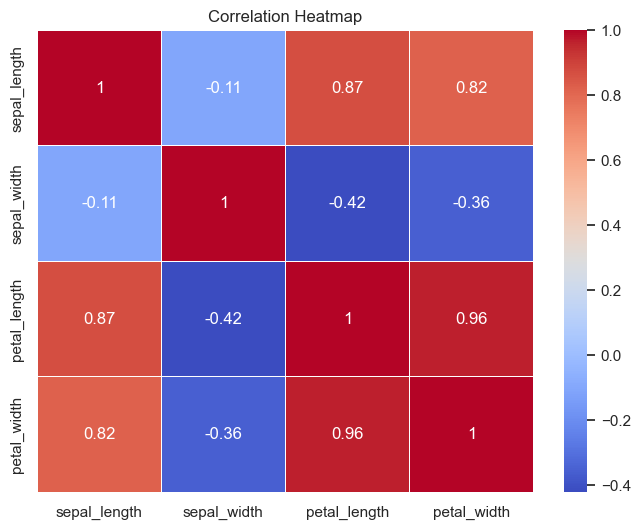

In [43]:
#Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


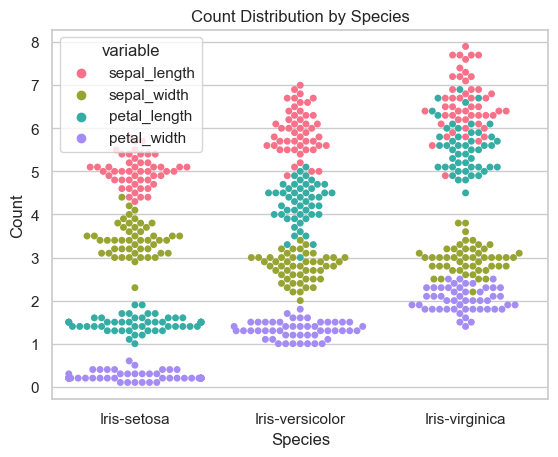

In [46]:
#Swarmplot
sns.swarmplot(data=df.melt(id_vars='species', var_name='variable', value_name='count'),
              x='species', y='count', hue='variable', palette='husl')
plt.title('Count Distribution by Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()


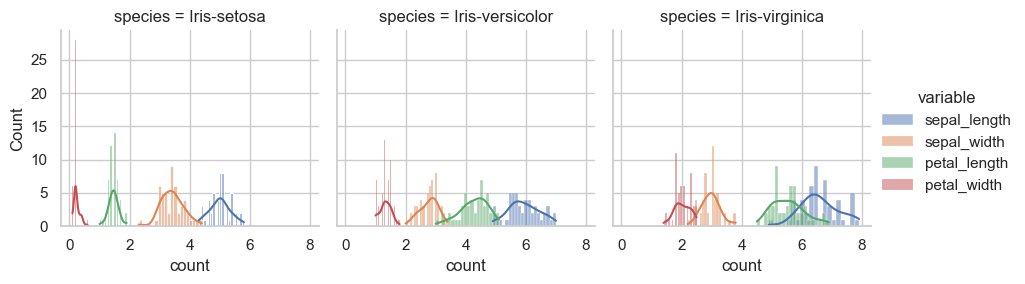

In [47]:
#FactGrid
g = sns.FacetGrid(df.melt(id_vars='species', var_name='variable', value_name='count'), col='species', hue='variable')
g.map(sns.histplot, 'count', bins=20, kde=True)
g.add_legend()
plt.show()


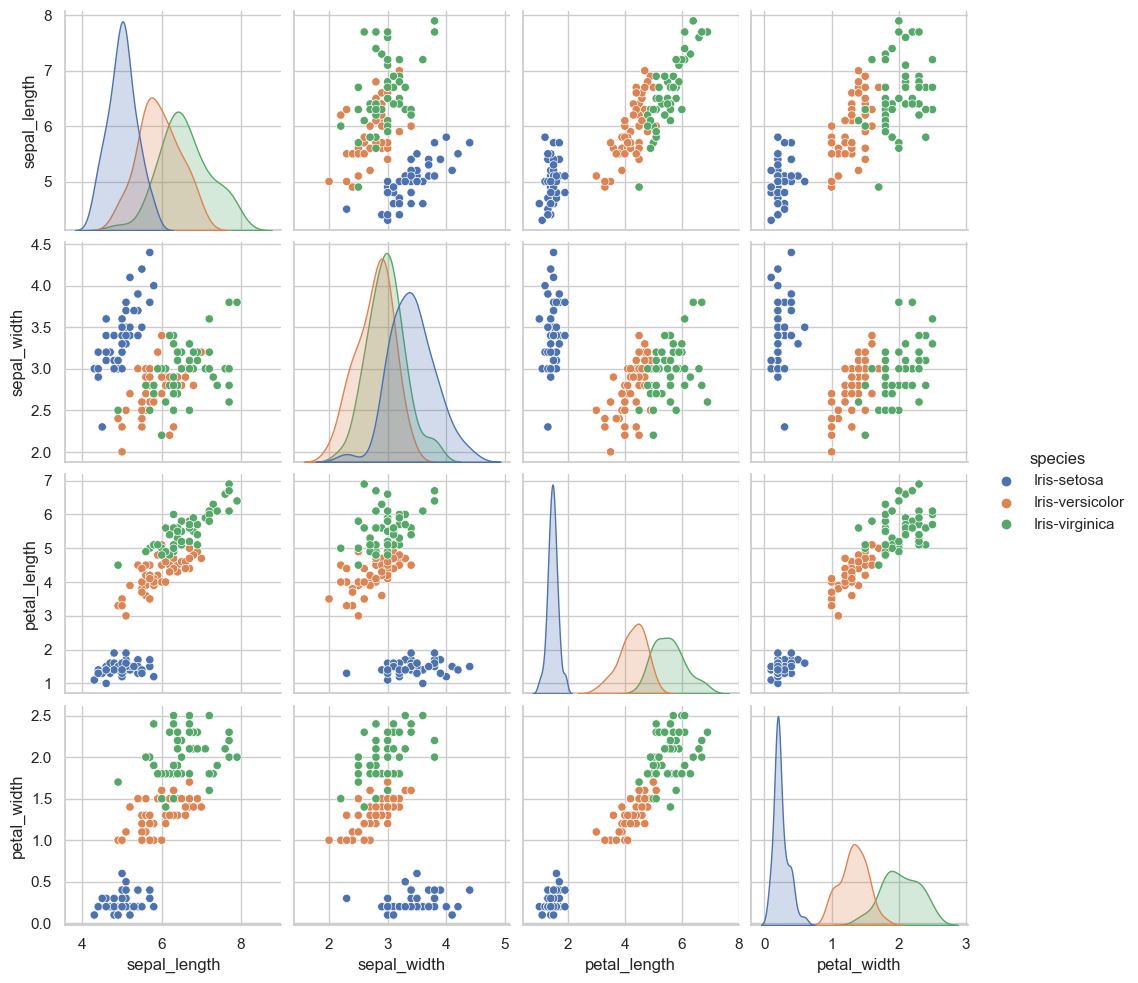

In [48]:
sns.pairplot(df, hue='species')

# Different Models

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,accuracy_score

In [52]:
x=df.drop('species',axis=1)
y_unencoded=df['species']
x.shape

(150, 4)

In [53]:
enc=LabelEncoder()
y=enc.fit_transform(y_unencoded)
y.shape

(150,)

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state = 0)

In [55]:
#LOGISTIC REGRESSION

log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

y_pred_log_reg=log_reg.predict(x_test)
acc_log_reg=accuracy_score(y_test,y_pred_log_reg)
print (f"Accuracy using a Logistic Regression model is {acc_log_reg*100}%")

Accuracy using a Logistic Regression model is 97.77777777777777%


In [56]:
#K-NEAREST NEIGHBOR

knc= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knc.fit(x_train, y_train)

y_pred_knc=knc.predict(x_test)
acc_knc=accuracy_score(y_test, y_pred_knc )
print (f"Accuracy using a K-Nearest Neighbor model is {acc_knc*100}%")

Accuracy using a K-Nearest Neighbor model is 97.77777777777777%


In [57]:
#DECISION TREES

dtrees= DecisionTreeClassifier()
dtrees.fit(x_train, y_train)

y_pred_dtrees = dtrees.predict(x_test)
acc_dtrees = accuracy_score(y_test,y_pred_dtrees)
print (f"Accuracy using a Decision Trees model is {acc_dtrees*100}%")

Accuracy using a Decision Trees model is 97.77777777777777%


In [58]:
#RANDOM FOREST

rf= RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)
acc_rf = accuracy_score(y_test,y_pred_rf)
print (f"Accuracy using a Random Forest model is {acc_rf*100}%")

Accuracy using a Random Forest model is 97.77777777777777%


# Done by Tushar kumar gupta